### Katrina Hernandez: Machine Learning Homework #1, Linear Regression and Gradient Descent

Notes: The goal of this assignment is to predict column 54 (number comments in H hours). Because we know that it is highly dependent on column 39 (H hours), make sure to include 39 as a feature in EVERY model.

### Loading packages and data.

In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
facebook = pd.read_csv('Features_Variant_1.csv', header=None)

In [3]:
print("Length before adding test sets:", len(facebook))

Length before adding test sets: 40949


In [4]:
test1 = pd.read_csv('Test_Case_1.csv', header=None)
test2 = pd.read_csv('Test_Case_2.csv', header=None)
test3 = pd.read_csv('Test_case_3.csv', header=None)
test4 = pd.read_csv('Test_case_4.csv', header=None)
test5 = pd.read_csv('Test_case_5.csv', header=None)
test6 = pd.read_csv('Test_case_6.csv', header=None)
test7 = pd.read_csv('Test_case_7.csv', header=None)
test8 = pd.read_csv('Test_case_8.csv', header=None)
test9 = pd.read_csv('Test_case_9.csv', header=None)
test10 = pd.read_csv('Test_case_10.csv', header=None)

In [5]:
facebook = facebook.append([test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)

In [6]:
print("Length after adding test sets:", len(facebook))

Length after adding test sets: 41949


In [7]:
new_names = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3', 'PageCategory_4']
old_names = facebook.columns[0:4]
facebook.rename(columns=dict(zip(old_names, new_names)), inplace=True)

new_names2 = ['CommentsBeforeBase_30', 'CommentsLast24h_31', 'CommentsLast48to24h_32', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'BaseTime_35',
'PostLength_36', 'PostShareCnt_37', 'PostPromoStatus_38', 'HoursReceived_39', 'SundayPublished_40', 'MondayPublished_41', 'TuesdayPublisher_42',
'WednesdayPublished_43', 'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46', 'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49',
'WednesdayBase_50', 'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53','CommentsNextH_Hours_54']
old_names2 = facebook.columns[29:54]
facebook.rename(columns=dict(zip(old_names2, new_names2)), inplace=True)

facebook2 = facebook.iloc[:, np.r_[0:4, 29:54]]
facebook2 = facebook2.drop('PostPromoStatus_38', axis=1)

### Feature scaling.

In [8]:
mean_1 = sum(facebook2['PagePopularity_1'])/len(facebook2['PagePopularity_1'])
sd_1 = np.std(facebook2['PagePopularity_1'])
mean_2 = sum(facebook2['PageCheckins_2'])/len(facebook2['PageCheckins_2'])
sd_2 = np.std(facebook2['PageCheckins_2'])
mean_3 = sum(facebook2['PageTalkingAbout_3'])/len(facebook2['PageTalkingAbout_3'])
sd_3 = np.std(facebook2['PageTalkingAbout_3'])
mean_4 = sum(facebook2['PageCategory_4'])/len(facebook2['PageCategory_4'])
sd_4 = np.std(facebook2['PageCategory_4'])
mean_30 = sum(facebook2['CommentsBeforeBase_30'])/len(facebook2['CommentsBeforeBase_30'])
sd_30 = np.std(facebook2['CommentsBeforeBase_30'])
mean_31 = sum(facebook2['CommentsLast24h_31'])/len(facebook2['CommentsLast24h_31'])
sd_31 = np.std(facebook2['CommentsLast24h_31'])
mean_32= sum(facebook2['CommentsLast48to24h_32'])/len(facebook2['CommentsLast48to24h_32'])
sd_32 = np.std(facebook2['CommentsLast48to24h_32'])
mean_33= sum(facebook2['CommentsFirst24h_33'])/len(facebook2['CommentsFirst24h_33'])
sd_33 = np.std(facebook2['CommentsFirst24h_33'])
mean_34 = sum(facebook2['CommentsDiffFirstSecondDay_34'])/len(facebook2['CommentsDiffFirstSecondDay_34'])
sd_34 = np.std(facebook2['CommentsDiffFirstSecondDay_34'])
### find out if you should scale BaseTime 
mean_36 = sum(facebook2['PostLength_36'])/len(facebook2['PostLength_36'])
sd_36 = np.std(facebook2['PostLength_36'])
mean_37 = sum(facebook2['PostShareCnt_37'])/len(facebook2['PostShareCnt_37'])
sd_37 = np.std(facebook2['PostShareCnt_37'])
### find out if you should scale HoursReceived 
mean_39 = sum(facebook2['HoursReceived_39'])/len(facebook2['HoursReceived_39'])
sd_39 = np.std(facebook2['HoursReceived_39'])
mean_40 = sum(facebook2['SundayPublished_40'])/len(facebook2['SundayPublished_40'])
sd_40 = np.std(facebook2['SundayPublished_40'])
mean_41 = sum(facebook2['MondayPublished_41'])/len(facebook2['MondayPublished_41'])
sd_41 = np.std(facebook2['MondayPublished_41'])
mean_42 = sum(facebook2['TuesdayPublisher_42'])/len(facebook2['TuesdayPublisher_42'])
sd_42 = np.std(facebook2['TuesdayPublisher_42'])
mean_43 = sum(facebook2['WednesdayPublished_43'])/len(facebook2['WednesdayPublished_43'])
sd_43 = np.std(facebook2['WednesdayPublished_43'])
mean_44 = sum(facebook2['ThursdayPublished_44'])/len(facebook2['ThursdayPublished_44'])
sd_44 = np.std(facebook2['ThursdayPublished_44'])
mean_45 = sum(facebook2['FridayPublished_45'])/len(facebook2['FridayPublished_45'])
sd_45 = np.std(facebook2['FridayPublished_45'])
mean_46 = sum(facebook2['SaturdayPublished_46'])/len(facebook2['SaturdayPublished_46'])
sd_46 = np.std(facebook2['SaturdayPublished_46'])
mean_47 = sum(facebook2['SundayBase_47'])/len(facebook2['SundayBase_47'])
sd_47 = np.std(facebook2['SundayBase_47'])
mean_48 = sum(facebook2['MondayBase_48'])/len(facebook2['MondayBase_48'])
sd_48 = np.std(facebook2['MondayBase_48'])
mean_49 = sum(facebook2['TuesdayBase_49'])/len(facebook2['TuesdayBase_49'])
sd_49 = np.std(facebook2['TuesdayBase_49'])
mean_50 = sum(facebook2['WednesdayBase_50'])/len(facebook2['WednesdayBase_50'])
sd_50 = np.std(facebook2['WednesdayBase_50'])
mean_51 = sum(facebook2['ThursdayBase_51'])/len(facebook2['ThursdayBase_51'])
sd_51 = np.std(facebook2['ThursdayBase_51'])
mean_52 = sum(facebook2['FridayBase_52'])/len(facebook2['FridayBase_52'])
sd_52 = np.std(facebook2['FridayBase_52'])
mean_53 = sum(facebook2['SaturdayBase_53'])/len(facebook2['SaturdayBase_53'])
sd_53 = np.std(facebook2['SaturdayBase_53'])
## DO NOT scale the target (54)

In [9]:
### make a copy for manipulations
facebook2_s = facebook2

In [10]:
facebook2_s['PagePopularity_1'] = (facebook2['PagePopularity_1'] - mean_1)/sd_1
facebook2_s['PageCheckins_2'] = (facebook2['PageCheckins_2'] - mean_2)/sd_2
facebook2_s['PageTalkingAbout_3'] = (facebook2['PageTalkingAbout_3'] - mean_3)/sd_3
facebook2_s['PageCategory_4'] = (facebook2['PageCategory_4'] - mean_4)/sd_4
facebook2_s['CommentsBeforeBase_30'] = (facebook2['CommentsBeforeBase_30'] - mean_30)/sd_30
facebook2_s['CommentsLast24h_31'] = (facebook2['CommentsLast24h_31'] - mean_31)/sd_31
facebook2_s['CommentsLast48to24h_32'] = (facebook2['CommentsLast48to24h_32'] - mean_32)/sd_32
facebook2_s['CommentsFirst24h_33'] = (facebook2['CommentsFirst24h_33'] - mean_33)/sd_33
facebook2_s['CommentsDiffFirstSecondDay_34'] = (facebook2['CommentsDiffFirstSecondDay_34'] - mean_34)/sd_34
## check to see if 35 should be scaled
facebook2_s['BaseTime_35'] = facebook2['BaseTime_35']
facebook2_s['PostLength_36'] = (facebook2['PostLength_36'] - mean_36)/sd_36
facebook2_s['PostShareCnt_37'] = (facebook2['PostShareCnt_37'] - mean_37)/sd_37
##facebook2_s['PostPromoStatus_38'] = (facebook2['PostPromoStatus_38'] - mean_38)/sd_38 --- appears to be zero
## check to see if 39 should be scaled
facebook2_s['HoursReceived_39'] = (facebook2['HoursReceived_39'] - mean_39)/sd_39
facebook2_s['SundayPublished_40'] = (facebook2['SundayPublished_40'] - mean_40)/sd_40
facebook2_s['MondayPublished_41'] = (facebook2['MondayPublished_41'] - mean_41)/sd_41
facebook2_s['TuesdayPublisher_42'] = (facebook2['TuesdayPublisher_42'] - mean_42)/sd_42
facebook2_s['WednesdayPublished_43'] = (facebook2['WednesdayPublished_43'] - mean_43)/sd_43
facebook2_s['ThursdayPublished_44'] = (facebook2['ThursdayPublished_44'] - mean_44)/sd_44
facebook2_s['FridayPublished_45'] = (facebook2['FridayPublished_45'] - mean_45)/sd_45
facebook2_s['SaturdayPublished_46'] = (facebook2['SaturdayPublished_46'] - mean_46)/sd_46
facebook2_s['SundayBase_47'] = (facebook2['SundayBase_47'] - mean_47)/sd_47
facebook2_s['MondayBase_48'] = (facebook2['MondayBase_48'] - mean_48)/sd_48
facebook2_s['TuesdayBase_49'] = (facebook2['TuesdayBase_49'] - mean_49)/sd_49
facebook2_s['WednesdayBase_50'] = (facebook2['WednesdayBase_50'] - mean_50)/sd_50
facebook2_s['ThursdayBase_51'] = (facebook2['ThursdayBase_51'] - mean_51)/sd_51
facebook2_s['FridayBase_52'] = (facebook2['FridayBase_52'] - mean_52)/sd_52
facebook2_s['SaturdayBase_53'] = (facebook2['SaturdayBase_53'] - mean_53)/sd_53
## don't scales the target
facebook2_s['CommentsNextH_Hours_54'] = facebook2['CommentsNextH_Hours_54']

In [11]:
i = 0
while (i < 27):
    print('min: ', facebook2_s.iloc[:, i:(i+1)].min(), 'max: ', facebook2_s.iloc[:, i:(i+1)].max(), 'avg: ', facebook2_s.iloc[:, i:(i+1)].mean())
    i += 1    

min:  PagePopularity_1   -0.200393
dtype: float64 max:  PagePopularity_1    70.851069
dtype: float64 avg:  PagePopularity_1    6.736237e-16
dtype: float64
min:  PageCheckins_2   -0.220202
dtype: float64 max:  PageCheckins_2    51.426992
dtype: float64 avg:  PageCheckins_2   -4.903442e-15
dtype: float64
min:  PageTalkingAbout_3   -0.363327
dtype: float64 max:  PageTalkingAbout_3    48.775627
dtype: float64 avg:  PageTalkingAbout_3   -8.406349e-16
dtype: float64
min:  PageCategory_4   -1.161633
dtype: float64 max:  PageCategory_4    4.096188
dtype: float64 avg:  PageCategory_4   -1.389540e-14
dtype: float64
min:  CommentsBeforeBase_30   -0.396924
dtype: float64 max:  CommentsBeforeBase_30    19.047724
dtype: float64 avg:  CommentsBeforeBase_30    3.455704e-15
dtype: float64
min:  CommentsLast24h_31   -0.277312
dtype: float64 max:  CommentsLast24h_31    32.700824
dtype: float64 avg:  CommentsLast24h_31   -4.537555e-15
dtype: float64
min:  CommentsLast48to24h_32   -0.269467
dtype: float64 

### Outlier detection.

In [12]:
## note: not sure why column names isn't changing but values are
i = 0
while (i < 27):
    q25 = np.percentile(facebook2_s.iloc[:, i:(i+1)].values, [25, 75])[0]
    q75 = np.percentile(facebook2_s.iloc[:, i:(i+1)].values, [25, 75])[1]
    iqr = q75-q25
    print(q25, q75, iqr)
    lower = q25-(1.5*iqr)
    upper = q75 + (1.5*iqr)
    print(facebook2_s[(facebook2_s.iloc[:, i:(i+1)] > upper).values].iloc[:, 0:1].count() + facebook2_s[(facebook2_s.iloc[:, i:(i+1)] < lower).values].iloc[:, 0:1].count())
    i += 1

-0.194508164337 -0.0114906200353 0.183017544302
PagePopularity_1    4662
dtype: int64
-0.220202487092 -0.215556596292 0.0046458907995
PagePopularity_1    8198
dtype: int64
-0.357930765771 0.022055649996 0.379986415767
PagePopularity_1    3766
dtype: int64
-0.761036927143 0.390676246522 1.15171317367
PagePopularity_1    2286
dtype: int64
-0.382950118455 -0.0755248525305 0.307425265925
PagePopularity_1    5405
dtype: int64
-0.277311771209 -0.135113557214 0.142198213994
PagePopularity_1    6170
dtype: int64
-0.269466714453 -0.146800013011 0.122666701442
PagePopularity_1    6538
dtype: int64
-0.385150970412 -0.0723714991797 0.312779471233
PagePopularity_1    5359
dtype: int64
-0.0958971514214 -0.00628742730423 0.0896097241172
PagePopularity_1    11977
dtype: int64
17.0 53.0 36.0
PagePopularity_1    0
dtype: int64
-0.333588576279 0.022767778975 0.356356355254
PagePopularity_1    3271
dtype: int64
-0.123275413021 -0.0601793928478 0.0630960201728
PagePopularity_1    5662
dtype: int64
0.164765

### Partition data into Testing & Training.

In [13]:
X = facebook2_s.iloc[:, 0:27]
y = pd.DataFrame(facebook2_s.iloc[:, 27:28])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4786)

### Version 1: Setting up a baseline for experimentation with Batch Gradient Descent.

In [15]:
m = len(X_train)
y = y_train

alpha = .1

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [17]:
beta_df[49]

CommentsDiffFirstSecondDay_34    13.692615
CommentsFirst24h_33              11.656124
FridayPublished_45                0.257061
HoursReceived_39                  0.360434
MondayPublished_41                0.141763
PageCheckins_2                   -0.785999
PagePopularity_1                 -0.531646
PageTalkingAbout_3                2.074168
PostShareCnt_37                   1.319732
SaturdayPublished_46             -0.071911
SundayPublished_40                0.000622
y-int                             7.804076
Name: 49, dtype: float64

In [18]:
train_MSE_versions = pd.DataFrame(pd.Series(train_MSE))
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version1- alpha of 0.1'})

coef_v1 = beta_df[49]

mm = len(X_test)

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v1, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v1 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
print("Test MSE for Version 1: ", round(MSE_test_v1, 2))

Test MSE for Version 1:  958.27


## Experimentation Part 1: Varying the Learning Rate (alpha)

### Version 2: Experimenting with a learning rate of 0.2 (Version 1 was 0.1).

In [20]:
m = len(X_train)
y = y_train

alpha = .2

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [22]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version2- alpha of 0.2'})

In [23]:
train_MSE_versions.head(40)

,Version1- alpha of 0.1,Version2- alpha of 0.2
0,1646.836341,1642.012462
1,1550.648822,1469.878312
2,1478.938168,1374.701598
3,1424.724185,1319.029019
4,1383.242454,1285.356073
5,1351.180304,1264.601885
6,1326.190982,1251.674282
7,1306.581404,1243.571684
8,1291.108923,1238.472630
9,1278.847132,1235.253795


In [24]:
coef_v2 = beta_df[49]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v2, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v2 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [25]:
print("Test MSE for Version 2: ", round(MSE_test_v2, 2))

Test MSE for Version 2:  958.85


### Version 3: Experimenting with a learning rate of 0.3

In [26]:
m = len(X_train)
y = y_train

alpha = .3

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [28]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version3- alpha of 0.3'})

In [29]:
train_MSE_versions.head(20)

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3
0,1646.836341,1642.012462,1659.949083
1,1550.648822,1469.878312,1410.472431
2,1478.938168,1374.701598,1312.905125
3,1424.724185,1319.029019,1269.070964
4,1383.242454,1285.356073,1248.517998
5,1351.180304,1264.601885,1238.743537
6,1326.190982,1251.674282,1234.060110
7,1306.581404,1243.571684,1231.800517
8,1291.108923,1238.472630,1230.701311
9,1278.847132,1235.253795,1230.160873


In [30]:
coef_v3 = beta_df[49]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v3, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v3 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [31]:
print("Test MSE for Version 3: ", round(MSE_test_v3, 2))

Test MSE for Version 3:  958.86


### Version 4: Experimenting with a learning rate of 0.4

In [32]:
m = len(X_train)
y = y_train

alpha = .4

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [34]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version4- alpha of 0.4'})

In [35]:
train_MSE_versions.head(20)

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3,Version4- alpha of 0.4
0,1646.836341,1642.012462,1659.949083,1647.474264
1,1550.648822,1469.878312,1410.472431,1347.481917
2,1478.938168,1374.701598,1312.905125,1269.825771
3,1424.724185,1319.029019,1269.070964,1243.603095
4,1383.242454,1285.356073,1248.517998,1234.545356
5,1351.180304,1264.601885,1238.743537,1231.377437
6,1326.190982,1251.674282,1234.060110,1230.252007
7,1306.581404,1243.571684,1231.800517,1229.843780
8,1291.108923,1238.472630,1230.701311,1229.691534
9,1278.847132,1235.253795,1230.160873,1229.632641


In [36]:
coef_v4 = beta_df[49]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v4, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v4 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [37]:
print("Test MSE for Version 4: ", round(MSE_test_v4, 2))

Test MSE for Version 4:  958.86


### Version 5: Experimenting with a learning rate of 0.75

In [38]:
m = len(X_train)
y = y_train

alpha = .75

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [40]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version5- alpha of 0.75'})

In [41]:
coef_v5 = beta_df[49]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v5, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v5 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
print("Test MSE for Version 5: ", round(MSE_test_v5, 2))

Test MSE for Version 5:  958.86


In [43]:
train_MSE_versions.head(20)

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3,Version4- alpha of 0.4,Version5- alpha of 0.75
0,1646.836341,1642.012462,1659.949083,1647.474264,1640.250591
1,1550.648822,1469.878312,1410.472431,1347.481917,1272.610993
2,1478.938168,1374.701598,1312.905125,1269.825771,1241.279525
3,1424.724185,1319.029019,1269.070964,1243.603095,1234.082584
4,1383.242454,1285.356073,1248.517998,1234.545356,1231.425777
5,1351.180304,1264.601885,1238.743537,1231.377437,1230.348220
6,1326.190982,1251.674282,1234.060110,1230.252007,1229.903661
7,1306.581404,1243.571684,1231.800517,1229.843780,1229.719457
8,1291.108923,1238.472630,1230.701311,1229.691534,1229.643008
9,1278.847132,1235.253795,1230.160873,1229.632641,1229.611253


### Version 6: Experimenting with a learning rate of 0.75

In [44]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
for i in range(50):

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j

In [46]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version6- alpha of 0.6'})

In [47]:
coef_v6 = beta_df[49]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v6, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v6 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [48]:
print("Test MSE for Version 6: ", round(MSE_test_v6, 2))

Test MSE for Version 6:  958.86


In [49]:
train_MSE_versions.iloc[:10,:6]

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3,Version4- alpha of 0.4,Version5- alpha of 0.75,Version6- alpha of 0.6
0,1646.836341,1642.012462,1659.949083,1647.474264,1640.250591,1649.093494
1,1550.648822,1469.878312,1410.472431,1347.481917,1272.610993,1286.747743
2,1478.938168,1374.701598,1312.905125,1269.825771,1241.279525,1238.038168
3,1424.724185,1319.029019,1269.070964,1243.603095,1234.082584,1231.043747
4,1383.242454,1285.356073,1248.517998,1234.545356,1231.425777,1229.917059
5,1351.180304,1264.601885,1238.743537,1231.377437,1230.348220,1229.693133
6,1326.190982,1251.674282,1234.060110,1230.252007,1229.903661,1229.632344
7,1306.581404,1243.571684,1231.800517,1229.843780,1229.719457,1229.609881
8,1291.108923,1238.472630,1230.701311,1229.691534,1229.643008,1229.599721
9,1278.847132,1235.253795,1230.160873,1229.632641,1229.611253,1229.594623


### Conclusion: Out-of-sample performance for all alphas is consistent because all converge well within 1,000 iterations tested. Alpha of 0.6 appears to be optimal. It converges in 4 - 5 iterations. 

### Visualizing Experiment #1

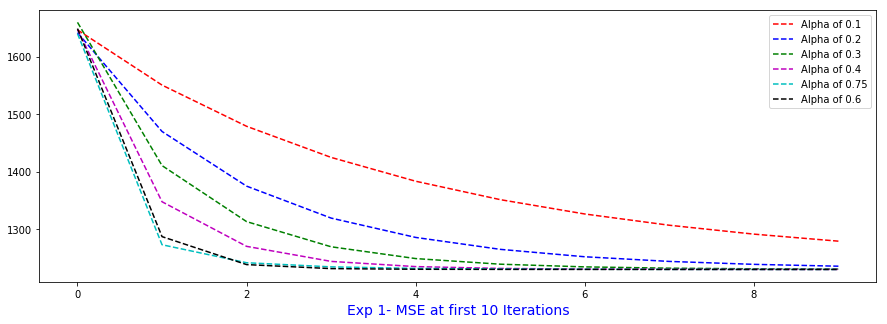

In [50]:
plot_MSE = train_MSE_versions.iloc[:10, :]

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(plot_MSE.index, plot_MSE['Version1- alpha of 0.1'], 'r--', label='Alpha of 0.1')
ax1.plot(plot_MSE.index, plot_MSE['Version2- alpha of 0.2'], 'b--', label='Alpha of 0.2')
ax1.plot(plot_MSE.index, plot_MSE['Version3- alpha of 0.3'], 'g--', label='Alpha of 0.3')
ax1.plot(plot_MSE.index, plot_MSE['Version4- alpha of 0.4'], 'm--', label='Alpha of 0.4')
ax1.plot(plot_MSE.index, plot_MSE['Version5- alpha of 0.75'], 'c--', label='Alpha of 0.75')
ax1.plot(plot_MSE.index, plot_MSE['Version6- alpha of 0.6'], 'k--', label='Alpha of 0.6')

ax1.set_xlabel('Exp 1- MSE at first 10 Iterations', fontsize=14, color='b')

plt.legend()

plt.show()

## Experimentation Part 2: Thresholding for convergence

In [51]:
diff = train_MSE_versions.iloc[1:50,:6]
diff = diff.shift(periods=-1, axis='index')

### Difference in MSE of iteration and subsequent iteration

In [52]:
first_difference_train_MSE = diff - train_MSE_versions
first_difference_train_MSE.iloc[:20, :6]

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3,Version4- alpha of 0.4,Version5- alpha of 0.75,Version6- alpha of 0.6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-71.710655,-95.176715,-97.567306,-77.656146,-31.331468,-48.709575
2,-54.213983,-55.672578,-43.834161,-26.222676,-7.196941,-6.994421
3,-41.481731,-33.672946,-20.552965,-9.057739,-2.656807,-1.126688
4,-32.062150,-20.754188,-9.774461,-3.167919,-1.077557,-0.223926
5,-24.989322,-12.927603,-4.683427,-1.125430,-0.444559,-0.060788
6,-19.609579,-8.102597,-2.259593,-0.408227,-0.184204,-0.022464
7,-15.472481,-5.099055,-1.099206,-0.152246,-0.076449,-0.010160
8,-12.261791,-3.218835,-0.540438,-0.058894,-0.031755,-0.005098
9,-9.751345,-2.037594,-0.269449,-0.023870,-0.013197,-0.002691


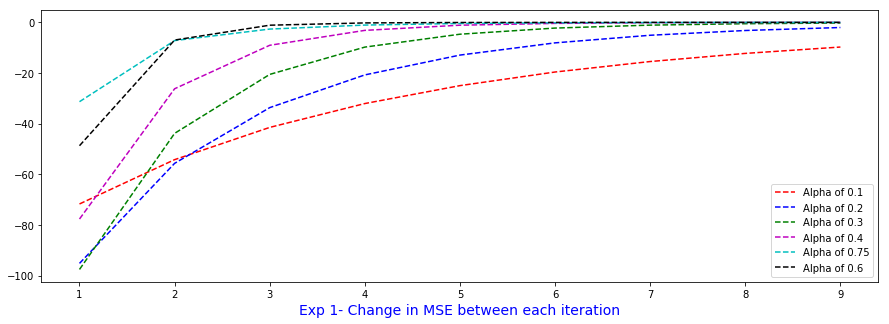

In [53]:
plot_fd = first_difference_train_MSE.iloc[:10, :6]

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(plot_fd.index, plot_fd['Version1- alpha of 0.1'], 'r--', label='Alpha of 0.1')
ax1.plot(plot_fd.index, plot_fd['Version2- alpha of 0.2'], 'b--', label='Alpha of 0.2')
ax1.plot(plot_fd.index, plot_fd['Version3- alpha of 0.3'], 'g--', label='Alpha of 0.3')
ax1.plot(plot_fd.index, plot_fd['Version4- alpha of 0.4'], 'm--', label='Alpha of 0.4')
ax1.plot(plot_fd.index, plot_fd['Version5- alpha of 0.75'], 'c--', label='Alpha of 0.75')
ax1.plot(plot_fd.index, plot_fd['Version6- alpha of 0.6'], 'k--', label='Alpha of 0.6')

ax1.set_xlabel('Exp 1- Change in MSE between each iteration', fontsize=14, color='b')

plt.legend()

plt.show()

### Threshold: MSE within 10

In [54]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 10:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

#### Coefficients: MSE change within 10

In [56]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.541725
CommentsFirst24h_33              11.343995
FridayPublished_45                0.399908
HoursReceived_39                  0.292115
MondayPublished_41                0.291811
PageCheckins_2                   -0.715071
PagePopularity_1                 -0.638383
PageTalkingAbout_3                2.172605
PostShareCnt_37                   1.418192
SaturdayPublished_46              0.063138
SundayPublished_40                0.167294
y-int                             7.658443
Name: 3, dtype: float64

In [57]:
coef_v7 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v7, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v7 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [58]:
print("Test MSE for Version 7: ", round(MSE_test_v7, 2))

Test MSE for Version 7:  956.48


### Threshold: MSE within 1

In [59]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 1:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

#### Coefficients: MSE change within 1

In [61]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.715997
CommentsFirst24h_33              11.641534
FridayPublished_45                0.274323
HoursReceived_39                  0.358174
MondayPublished_41                0.159619
PageCheckins_2                   -0.787010
PagePopularity_1                 -0.562203
PageTalkingAbout_3                2.090505
PostShareCnt_37                   1.326042
SaturdayPublished_46             -0.054237
SundayPublished_40                0.016040
y-int                             7.811166
Name: 5, dtype: float64

In [62]:
coef_v8 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v8, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v8 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [63]:
print("Test MSE for Version 8: ", round(MSE_test_v8, 2))

Test MSE for Version 8:  958.34


### Threshold: MSE within 0.1

In [64]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 0.1:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

#### Coefficients: MSE change within 0.1

In [66]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.728612
CommentsFirst24h_33              11.685073
FridayPublished_45                0.269466
HoursReceived_39                  0.369437
MondayPublished_41                0.152827
PageCheckins_2                   -0.796204
PagePopularity_1                 -0.545308
PageTalkingAbout_3                2.080907
PostShareCnt_37                   1.307971
SaturdayPublished_46             -0.058993
SundayPublished_40                0.008119
y-int                             7.829751
Name: 6, dtype: float64

In [67]:
coef_v9 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v9, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v9 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [68]:
print("Test MSE for Version 9: ", round(MSE_test_v9, 2))

Test MSE for Version 9:  958.61


### Threshold: MSE within 100

In [69]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()
beta_6 = rand.random()
beta_7 = rand.random()
beta_8 = rand.random()
beta_9 = rand.random()
beta_10 = rand.random()
beta_11 = rand.random()

X = X_train[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'PostShareCnt_37': beta_2, 'CommentsFirst24h_33': beta_3, 'PageCheckins_2': beta_4, 'SundayPublished_40': beta_5, 'FridayPublished_45': beta_6, 'SaturdayPublished_46': beta_7, 'MondayPublished_41': beta_8
         , 'CommentsDiffFirstSecondDay_34': beta_9, 'PagePopularity_1': beta_10, 'PageTalkingAbout_3': beta_11, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 100:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d4 = sum(XtimesBeta['resid']*X['PageCheckins_2'])/m
    d5 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d6 = sum(XtimesBeta['resid']*X['FridayPublished_45'])/m
    d7 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d8 = sum(XtimesBeta['resid']*X['MondayPublished_41'])/m
    d9 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d10 = sum(XtimesBeta['resid']*X['PagePopularity_1'])/m
    d11 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d2)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d3)
    newBeta_j['PageCheckins_2'] = beta_j['PageCheckins_2'] - alpha*(d4)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d5)
    newBeta_j['FridayPublished_45'] = beta_j['FridayPublished_45'] - alpha*(d6)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d7)
    newBeta_j['MondayPublished_41'] = beta_j['MondayPublished_41'] - alpha*(d8)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d9)
    newBeta_j['PagePopularity_1'] = beta_j['PagePopularity_1'] - alpha*(d10)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d11)

    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

#### Coefficients: MSE within 100

In [71]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.202582
CommentsFirst24h_33              11.083916
FridayPublished_45                0.318057
HoursReceived_39                  0.190161
MondayPublished_41                0.240362
PageCheckins_2                   -0.560126
PagePopularity_1                 -0.357261
PageTalkingAbout_3                2.297071
PostShareCnt_37                   1.615035
SaturdayPublished_46             -0.013910
SundayPublished_40                0.170816
y-int                             7.364424
Name: 2, dtype: float64

In [72]:
coef_v10 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'PostShareCnt_37', 'CommentsFirst24h_33', 'PageCheckins_2', 'SundayPublished_40', 'FridayPublished_45', 'SaturdayPublished_46', 'MondayPublished_41', 'CommentsDiffFirstSecondDay_34', 'PagePopularity_1', 'PageTalkingAbout_3']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v10, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v10 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [73]:
print("Test MSE for Version 10: ", round(MSE_test_v10, 2))

Test MSE for Version 10:  954.09


## Experimentation Part 3: Pick five features randomly

Approach to randoms: I will pick every other variable in the current 11 starting from 1, HoursReceived_39.

In [74]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()

X = X_train[['HoursReceived_39', 'CommentsFirst24h_33', 'SundayPublished_40', 'SaturdayPublished_46', 'CommentsDiffFirstSecondDay_34']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'CommentsFirst24h_33': beta_2, 'SundayPublished_40': beta_3, 'SaturdayPublished_46': beta_4, 'CommentsDiffFirstSecondDay_34': beta_5, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [75]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 100:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d3 = sum(XtimesBeta['resid']*X['SundayPublished_40'])/m
    d4 = sum(XtimesBeta['resid']*X['SaturdayPublished_46'])/m
    d5 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m

    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d2)
    newBeta_j['SundayPublished_40'] = beta_j['SundayPublished_40'] - alpha*(d3)
    newBeta_j['SaturdayPublished_46'] = beta_j['SaturdayPublished_46'] - alpha*(d4)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d5)


    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

In [76]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version11- random 5'})

#### Coefficients: Random 5

In [77]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.262522
CommentsFirst24h_33              12.088333
HoursReceived_39                 -0.268898
SaturdayPublished_46             -0.098925
SundayPublished_40                0.145192
y-int                             7.404143
Name: 2, dtype: float64

In [78]:
coef_v11 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'CommentsFirst24h_33', 'SundayPublished_40', 'SaturdayPublished_46', 'CommentsDiffFirstSecondDay_34']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v11, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v11 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [79]:
print("Test MSE for Version 11 ", round(MSE_test_v11))

Test MSE for Version 11  964.0


## Experimentation Part 4: Pick five features with domain knowledge

For this experiment, I chose the five features with the most importance from Experiment #1: CommentsFirst24h, CommentsDiffFirstSecondDay, PageTalkingAbout, PostShareCnt, and HoursReceived.

In [80]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()

X = X_train[['HoursReceived_39', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'PageTalkingAbout_3', 'PostShareCnt_37']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'CommentsFirst24h_33': beta_2, 'CommentsDiffFirstSecondDay_34': beta_3, 'PageTalkingAbout_3': beta_4, 'PostShareCnt_37': beta_5, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [81]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 100:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d4 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m
    d5 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m


    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d2)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d3)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d4)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d5)


    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

In [82]:
train_MSE_versions = pd.merge(pd.DataFrame(train_MSE_versions), pd.DataFrame(pd.Series(train_MSE)), right_index=True, left_index=True)
train_MSE_versions = train_MSE_versions.rename(columns={0:'Version12- my 5'})

In [83]:
beta_df.iloc[:, -1]

CommentsDiffFirstSecondDay_34    13.143213
CommentsFirst24h_33              10.830122
HoursReceived_39                  0.360191
PageTalkingAbout_3                2.350412
PostShareCnt_37                   1.398017
y-int                             7.344451
Name: 2, dtype: float64

In [84]:
coef_v12 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'PageTalkingAbout_3', 'PostShareCnt_37']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v12, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v12 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [85]:
print("Test MSE for Version 12: ", round(MSE_test_v12))

Test MSE for Version 12:  953.0


In [86]:
train_MSE_versions

,Version1- alpha of 0.1,Version2- alpha of 0.2,Version3- alpha of 0.3,Version4- alpha of 0.4,Version5- alpha of 0.75,Version6- alpha of 0.6,Version11- random 5,Version12- my 5
0,1646.836341,1642.012462,1659.949083,1647.474264,1640.250591,1649.093494,1661.111702,1654.492513
1,1550.648822,1469.878312,1410.472431,1347.481917,1272.610993,1286.747743,1284.651911,1280.166074
2,1478.938168,1374.701598,1312.905125,1269.825771,1241.279525,1238.038168,1242.180463,1239.113842


### Trying different convergence threshold

In [87]:
m = len(X_train)
y = y_train

alpha = .6

np.random.seed(2019)
beta_0 = rand.random()
beta_1 = rand.random()
beta_2 = rand.random()
beta_3 = rand.random()
beta_4 = rand.random()
beta_5 = rand.random()

X = X_train[['HoursReceived_39', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'PageTalkingAbout_3', 'PostShareCnt_37']]

X['y-int'] = 1

betas = {'HoursReceived_39': beta_1, 'CommentsFirst24h_33': beta_2, 'CommentsDiffFirstSecondDay_34': beta_3, 'PageTalkingAbout_3': beta_4, 'PostShareCnt_37': beta_5, 'y-int': beta_0}
beta_j = pd.Series(betas)
beta_j

beta_df = pd.DataFrame(beta_j)

train_MSE = pd.Series([])

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [88]:
first_diff = 1000
i = 0

while i < 1000 and first_diff > 10:

    XtimesBeta = X.multiply(other=beta_j, axis=1)

    ### y-hat: sum all of the columns for each row
    XtimesBeta['y-hat'] = XtimesBeta.sum(axis=1)

    XtimesBeta = pd.merge(XtimesBeta, y, left_index=True, right_index=True)

    XtimesBeta['resid'] = XtimesBeta['y-hat'] - XtimesBeta['CommentsNextH_Hours_54']

    train_MSE[i] = sum((XtimesBeta['resid']*XtimesBeta['resid']))/m

    d0 = sum(XtimesBeta['resid'])/m
    d1 = sum(XtimesBeta['resid']*X['HoursReceived_39'])/m
    d2 = sum(XtimesBeta['resid']*X['CommentsFirst24h_33'])/m
    d3 = sum(XtimesBeta['resid']*X['CommentsDiffFirstSecondDay_34'])/m
    d4 = sum(XtimesBeta['resid']*X['PageTalkingAbout_3'])/m
    d5 = sum(XtimesBeta['resid']*X['PostShareCnt_37'])/m


    newBeta_j = pd.Series([])
    newBeta_j['y-int'] = beta_j['y-int'] - alpha*(d0)
    newBeta_j['HoursReceived_39'] = beta_j['HoursReceived_39'] - alpha*(d1)
    newBeta_j['CommentsFirst24h_33'] = beta_j['CommentsFirst24h_33'] - alpha*(d2)
    newBeta_j['CommentsDiffFirstSecondDay_34'] = beta_j['CommentsDiffFirstSecondDay_34'] - alpha*(d3)
    newBeta_j['PageTalkingAbout_3'] = beta_j['PageTalkingAbout_3'] - alpha*(d4)
    newBeta_j['PostShareCnt_37'] = beta_j['PostShareCnt_37'] - alpha*(d5)


    beta_df = pd.concat([beta_df, newBeta_j], axis=1)
    
    beta_df = beta_df.rename(columns={beta_df.columns[-1]: i })

    beta_j = newBeta_j
    
    if i > 0:
        first_diff = train_MSE[(i-1)] - train_MSE[i]
        
    i += 1

In [89]:
coef_v13 = beta_df.iloc[:, -1]

test = X_test[['HoursReceived_39', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'PageTalkingAbout_3', 'PostShareCnt_37']]

mm = len(X_test)

test['y-int'] = 1
testTimesBeta = test.multiply(other=coef_v13, axis=1)

testTimesBeta['y-hat'] = testTimesBeta.sum(axis=1)

testTimesBeta = pd.merge(testTimesBeta, y_test, left_index=True, right_index=True)
testTimesBeta['resid'] = testTimesBeta['y-hat'] - testTimesBeta['CommentsNextH_Hours_54']
MSE_test_v13 = sum(testTimesBeta['resid']*testTimesBeta['resid'])/mm

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [90]:
print("Test MSE for Version 13: ", round(MSE_test_v13))

Test MSE for Version 13:  956.0
